# This is a (quick-)guide for different transform actions via panda I often use in my daily business (including often used parameters)
### For complete guide visit official documentary on https://pandas.pydata.org/docs/reference/index.html

Content:
1. **Load Data (from excel)**  
2. **General Infos on the dataframe / Extraction of specific values**  
2.1 Show values  
2.2 Meta-data  
2.3 Identify missing values  
2.4 First infos on the values of the numerical variables  
2.5 First infos on the values of the categorical variables  
3. **Change table-layout and content**  
3.1 Rename columns  
3.2 New order or sub-table with filters  
3.3 sort and delete duplicates  
4. **Change data**  
4.1 Convert datatypes  
4.2 Fill Nans and change specific values  
4.3 Merge dataframes to add Information  
4.4 Create new columns  
5. **Get more information**  
5.1 Aggregate  
5.2 Correlation  
6. **Save Data**  

In [1]:
# first of all import the modules
import pandas as pd
import numpy as np
# some actions require numpy

### 1. Load Data (from excel)

In [2]:
df = pd.read_excel('Input_folder/excel-for_guide.xlsx',sheet_name = 'Sheet_1', skiprows = 3)
# skiprows is relevant, if the table does not begin in line 1
# if the table is not in the first column use for example usecols = "B:AA"

In [3]:
#make a copy if you want to test something and don't want to change the original
df_test = df.copy()

## 2. General Infos on the dataframe / Extraction of specific values

### 2.1 Show values

In [4]:
# to show the first x lines use df.head(x) where x is 5 by standard
# alternatively you can use df.tail(x) for the bottom x or df.sample(x) for a random sample
df.head()

,Key,Customer123,Country,Group,Group-No.,Revenue
0,1,abc gmbh,Germany,A-Group,1.0,3000
1,2,cd ag,Germany,A-Group,1.0,600
2,3,abcdef gmbh,France,NaN,NaN,2000
3,4,sadksjl ltd.,China,B-Group,2.0,2500
4,5,sada ag,China,C-Group,3.0,1000


In [5]:
# Get all entries with specific values, e.g. all chinese customers
df[df['Country']=='China']
# you can also use > or < to show all rows with values greater or lower specific value

,Key,Customer123,Country,Group,Group-No.,Revenue
3,4,sadksjl ltd.,China,B-Group,2.0,2500
4,5,sada ag,China,C-Group,3.0,1000


### 2.2 Meta-data

In [6]:
df.info()
# shows te columns, datatype and # of non-null values within the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Key          8 non-null      int64  
 1   Customer123  8 non-null      object 
 2   Country      6 non-null      object 
 3   Group        6 non-null      object 
 4   Group-No.    6 non-null      float64
 5   Revenue      8 non-null      int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 512.0+ bytes


In [7]:
df.shape
# shows # of rows and columns

(8, 6)

In [8]:
df.dtypes
# current type of the variables; scroll below to see how to change the type

Key              int64
Customer123     object
Country         object
Group           object
Group-No.      float64
Revenue          int64
dtype: object

### 2.3 Identify missing values

In [9]:
df.isnull().sum()
# No. of Null-values

Key            0
Customer123    0
Country        2
Group          2
Group-No.      2
Revenue        0
dtype: int64

In [10]:
df.isnull().sum() / df.shape[0] * 100
# Percentage of Null-values compared to No. of data

Key             0.0
Customer123     0.0
Country        25.0
Group          25.0
Group-No.      25.0
Revenue         0.0
dtype: float64

In [11]:
# visualisation via missingno (first install via pip install missingno)
import missingno as msno

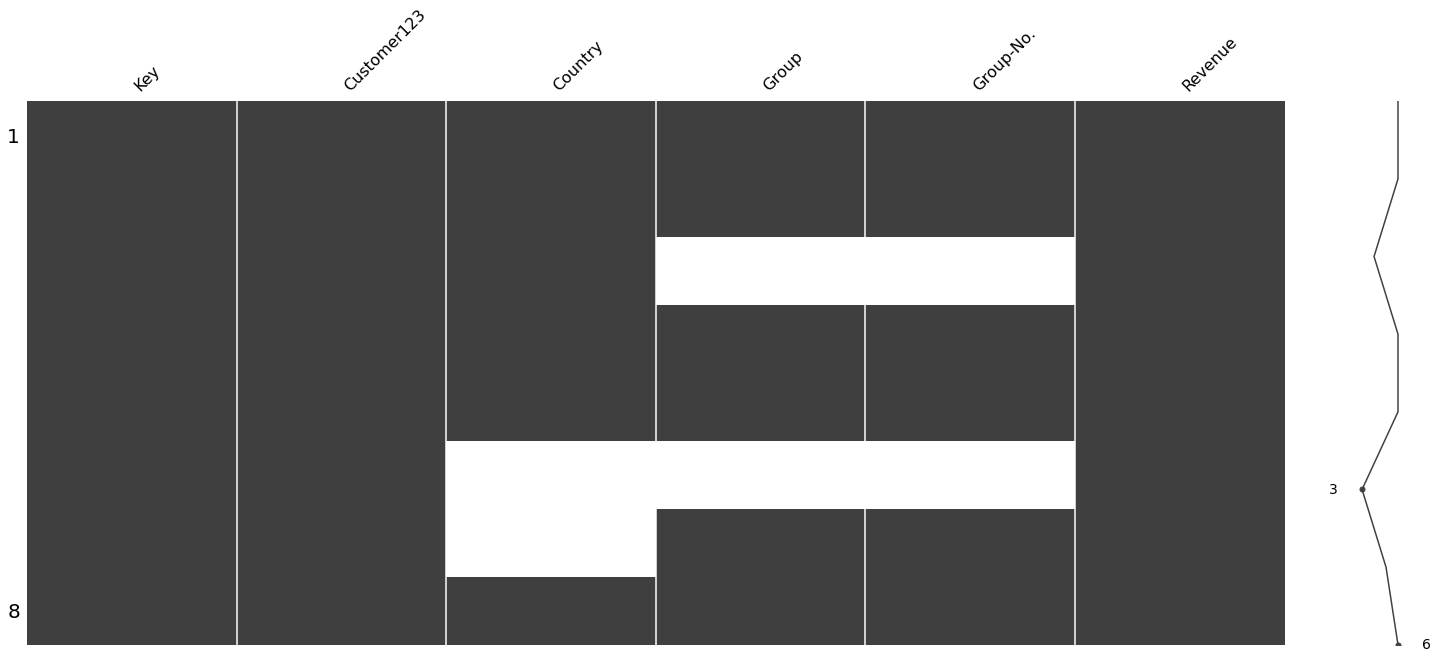

In [12]:
msno.matrix(df)

In [12]:
# show all null value line
df[df.isna().any(axis=1)]
# or column-based
df[df['Country'].isna()]

,Key,Customer123,Country,Group,Group-No.,Revenue
5,6,asda ag,NaN,NaN,NaN,10000
6,7,Test AG,NaN,C-Group,3.0,300


### 2.4 First infos on the values of the numerical variables

In [13]:
df.describe()
# shows different values for all numerical columns, e.g. min/max, percentiles, etc.

,Key,Group-No.,Revenue
count,8.00000,6.000000,8.000000
mean,4.50000,2.166667,2437.500000
std,2.44949,0.983192,3233.281173
min,1.00000,1.000000,100.000000
25%,2.75000,1.250000,525.000000
50%,4.50000,2.500000,1500.000000
75%,6.25000,3.000000,2625.000000
max,8.00000,3.000000,10000.000000


### 2.5 First infos on the values of the categorical variables

In [14]:
df.Country.unique()
# Shows the different values of the column

array(['Germany', 'France', 'China', nan], dtype=object)

In [15]:
df.Country.nunique()
# No. of different values in the column

3

In [16]:
df.Country.value_counts()
# like unique + count of the values

Germany    3
China      2
France     1
Name: Country, dtype: int64

In [17]:
round(df.Country.value_counts()/ df.Country.notnull().sum()*100,2)
# Percentage of the values compared to all non-null values

Germany    50.00
China      33.33
France     16.67
Name: Country, dtype: float64

In [18]:
df.columns
# shows the name of the columns

Index(['Key', 'Customer123', 'Country', 'Group', 'Group-No.', 'Revenue'], dtype='object')

In [19]:
# can also be stored in a list for later usage (loops, etc.)
column_list = df.columns.tolist()
column_list

['Key', 'Customer123', 'Country', 'Group', 'Group-No.', 'Revenue']

## 3. Change table-layout and content


### 3.1 Rename columns

In [20]:
# There might be different reasons to rename columns, some might be:
# - you want to merge the table with another one, therefore, the key-columns need identical naming
# - the name of the column is irritating, meaningless, wrong spelled, etc.
# - for some operations, it is helpful not having spaces in the column name, so you can use df.Group to operate on this column

df.rename(columns={'Customer123':'Customer'}, inplace = True)

# the "inplace" is important to commit the changes- without, the changes would not be saved. 


### 3.2 New order or sub-table with filters

In [21]:
df = df[['Country','Key', 'Customer', 'Group', 'Group-No.', 'Revenue']]
# ...reorders the columns
# you can also create a new dataframe with a selection of the columns, e.g.:
df1= df[['Customer','Group']]

In [22]:
# you can also create new dfs, via filter
df111 = df[df['Country'] == 'China']
df112 = df[df['Country'] != 'China']
df113 = df[(df['Country'] == 'China') | (df['Country'] == 'Germany')]
# | equals 'or'
# you can also combine multiple conditions on different variables with the |
df121 = df[df['Key'] >= 3]
df122 = df[(df['Key'] >= 3) & (df['Key']<=6)] 
# sometimes you want to delete or select all rows, with values within a list.
# e.g. all rows with countries within a list
list_of_asian_countries = ['Japan', 'China', 'Taiwan']
# select
df131 = df[df['Country'].isin(list_of_asian_countries)]
# delete
df132 = df[~df['Country'].isin(list_of_asian_countries)]
# if you are working with numbers instead of strings, it might help to convert to string
df141 = df[df['Country'].astype(str).isin(list_of_asian_countries)]

### 3.3 sort and delete duplicates

In [23]:
#to sort values just select the columns
df.sort_values(by=['Key','Country'], ascending=False,inplace=True)

df.drop_duplicates(subset=['Key','Country'], keep='first', inplace = True)

## 4. Change data

### 4.1 Convert datatypes

In [24]:
# Especially, when you have numerical keys, pandas handles them as floats and you want them to be strings. 
# To get rid of the decimal places, first convert to int, then to str.  
df = df.astype({'Group-No.':int})
df = df.astype({'Group-No.':str})
# you will receive an error message if the column contains strings or nans
# so first correct them

ValueError: Cannot convert non-finite values (NA or inf) to integer

### 4.2 Fill Nans and change specific values

In [25]:
df['Country'].fillna(0, inplace = True)
#
df['Country'] = np.where(df['Country']=='Germany', 'National','International')
# This will change all values of 'Germany' to 'National' and otherwise to 'International' 
df['Country'] = np.where(df['Country']=='Germany', 'National',df['Country'])
# This will change all values of 'Germany' to 'National' and otherwise to keep the old value
# you can also adress a new column:
df['Continent'] = np.where(df['Country']=='Germany', 'Europe','Other')

# if you just want to change one specific value you can just use the .replace method
df['Country'].replace('Germany', 'Deutschland', inplace = True)

### 4.3 Merge dataframes to add Information

In [26]:
sales_rep = pd.read_excel('input_folder/Sales_responsible_mapping.xlsx')
print(sales_rep)
df_merged = pd.merge(df, sales_rep, on ='Country', how = 'left')
# Mostly I use the following values: 
# inner (the new df contains only lines with values in both dfs), 
# outer (the new df contains all lines and fills up with NaNs)
# left (the new df contains all lines of the first df and fills up with NaNs)
print()
print(df_merged)

         Country Sales Responsible
0  International               Lee
1       National           Michael

         Country  Key      Customer    Group  Group-No.  Revenue Continent  \
0       National    8       Test AG  C-Group        3.0      100     Other   
1  International    7       Test AG  C-Group        3.0      300     Other   
2  International    6       asda ag      NaN        NaN    10000     Other   
3  International    5       sada ag  C-Group        3.0     1000     Other   
4  International    4  sadksjl ltd.  B-Group        2.0     2500     Other   
5  International    3   abcdef gmbh      NaN        NaN     2000     Other   
6       National    2         cd ag  A-Group        1.0      600     Other   
7       National    1      abc gmbh  A-Group        1.0     3000     Other   

  Sales Responsible  
0           Michael  
1               Lee  
2               Lee  
3               Lee  
4               Lee  
5               Lee  
6           Michael  
7           Mic

### 4.4 Create new columns

In [27]:
# you can simply create a new column via

df['new_column'] = 'New'

# I suggest to use _ for blank spaces. So it is usable e.g. like:  df.new_column.value_counts()

# to create a new column via a formula you can also use apply

# first define a function to apply
def margin(x):
    return x * 0.15

# then refer to it as follows:
df_test['Margin'] = df_test['Revenue'].apply(margin)

# alternatively you can use a lambda function
df_test['Margin2'] = df_test.Revenue.apply(lambda x: x * 0.15)
# this also works for change of values
df_test['Continent'] = df_test.apply(lambda x: 'Europe' if x['Country'] == 'Germany' or x['Country'] == 'France' else 'Asia', axis = 1)
df_test

,Key,Customer123,Country,Group,Group-No.,Revenue,Margin,Margin2,Continent
0,1,abc gmbh,Germany,A-Group,1.0,3000,450.0,450.0,Europe
1,2,cd ag,Germany,A-Group,1.0,600,90.0,90.0,Europe
2,3,abcdef gmbh,France,NaN,NaN,2000,300.0,300.0,Europe
3,4,sadksjl ltd.,China,B-Group,2.0,2500,375.0,375.0,Asia
4,5,sada ag,China,C-Group,3.0,1000,150.0,150.0,Asia
5,6,asda ag,NaN,NaN,NaN,10000,1500.0,1500.0,Asia
6,7,Test AG,NaN,C-Group,3.0,300,45.0,45.0,Asia
7,8,Test AG,Germany,C-Group,3.0,100,15.0,15.0,Europe


## 5. Get more information

### 5.1 Aggregate

In [28]:
# Groupby can be used for transformations and also for different analysis
df = df.groupby(['Country', 'Group']).sum().reset_index()
# all lines with identical parameters in Country and Group will be shown in one line
# therefore all numerical values will be summed up
# all object dtypes will get lost. 
df.groupby(['Country', 'Group'])['Revenue'].mean()
# shows average revenue after grouping
# also count is helpful to see the number of items per Group

Country        Group  
International  B-Group    2500
               C-Group    1300
National       A-Group    3600
               C-Group     100
Name: Revenue, dtype: int64

### 5.2 Correlation

In [29]:
df.corr()
# I will get deeper on this with another guide for using matplotlib and seaborn

,Key,Group-No.,Revenue
Key,1.000000,0.952594,-0.720162
Group-No.,0.952594,1.000000,-0.474960
Revenue,-0.720162,-0.474960,1.000000


## 6. Save Data

In [30]:
writer = pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')

#write each DataFrame to a specific sheet
df.to_excel(writer, sheet_name='Sheet 1')
df1.to_excel(writer, sheet_name='Sheet 2')
df_test.to_excel(writer, sheet_name='Sheet 1243')

#close the Pandas Excel writer and output the Excel file
writer.save()